<a href="https://colab.research.google.com/github/Islom9899/matplotlib-project/blob/main/04_VISUAL_04_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 4-MODUL. VIZUALIZASIYA

## 4-AMALIYOT. Distribution


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Ushbu amaliyotda uybor.uz saytidan yuklab olingan ma'lumotlar tahlili bilan shu'gullanamiz.

In [53]:
df = pd.read_csv("https://github.com/anvarnarz/praktikum_datasets/blob/main/uybor_scrapping.csv?raw=true")
df.head()

,location,district,rooms,size,level,max_levels,price,lat,lng
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57.0,4,4,52000,41.371471,69.281049
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52.0,4,5,56000,41.291115,69.261104
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42.0,4,4,37000,41.280784,69.223683
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65.0,1,4,49500,41.290163,69.196862
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70.0,3,5,55000,41.300156,69.210831


#### Yuqoridagi jadvalda Toshkent shahridagi sotildagian uylar haqida ma'lumotlar jamlangan.

## 1-VAZIFA. Jadvaldan xonalari 5 xonadan ko'p bo'lgan, narxi 200000 mingdan, maydoni 250kv.m dan ortiq bo'lgan uylarni tashlab yuboring

In [54]:
#JAVOBINGIZNI SHUYERGA YOZING
df=df[df['rooms']<6]
df=df[df['price']<200000]
df=df[df['size']<250]
df.shape

(7216, 9)

In [55]:
#@title Natija
df=df[df['rooms']<6]
df=df[df['size']<250]
df=df[df['price']<200000]
df.shape

(7216, 9)

## 2-VAZIFA. `subplot` yordamida uylarning narxi va xonalar soni taqsimoti grafiklarini yonma yon chizing

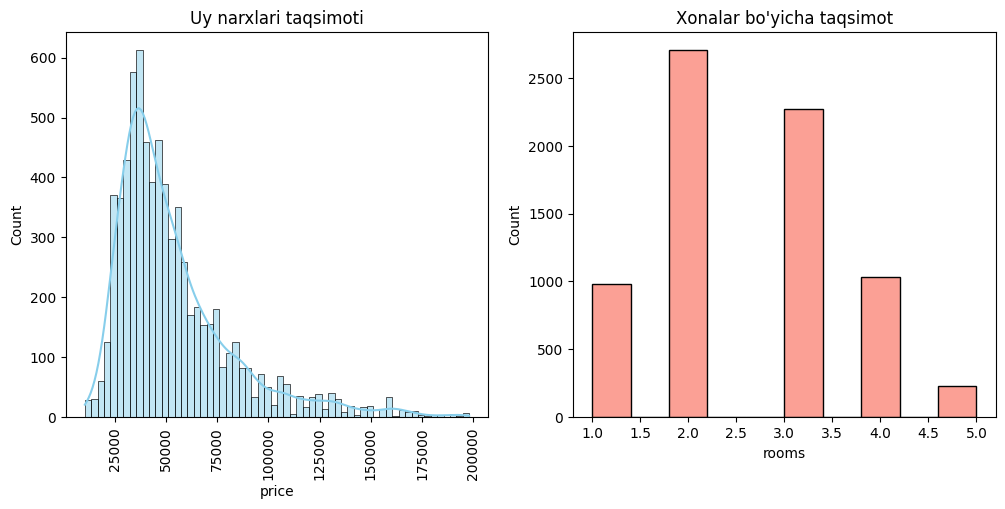

In [76]:
#JAVOBINGIZNI SHUYERGA YOZING
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='price', kde=True, color='skyblue')
plt.title('Uy narxlari taqsimoti')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='rooms', bins=10, kde=False, color='salmon')
plt.title('Xonalar bo\'yicha taqsimot')

plt.show()

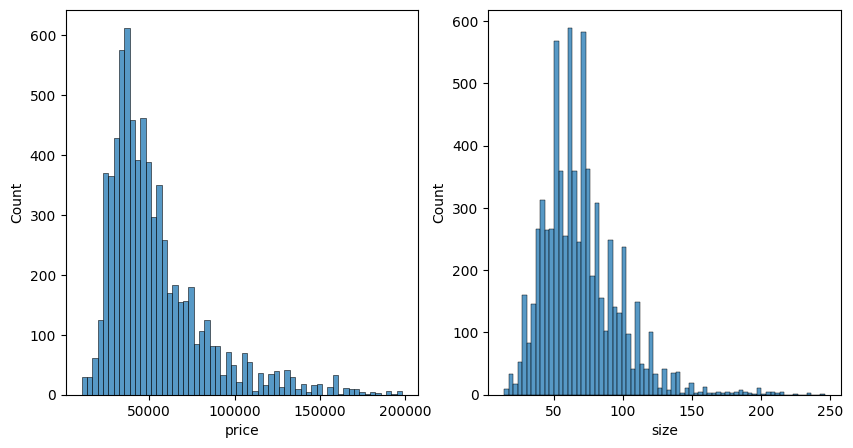

In [57]:
#@title Kutilgan natija
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(data=df, x='price')
plt.subplot(1,2,2)
sns.histplot(data=df, x='size')
plt.show()

### 2-VAZIFA. Uylarning narxi taqsimoti va narx va maydoni o'rtasidagi bog'liqlik grafiklarini bitta chizmada ustma ust chiqaring.

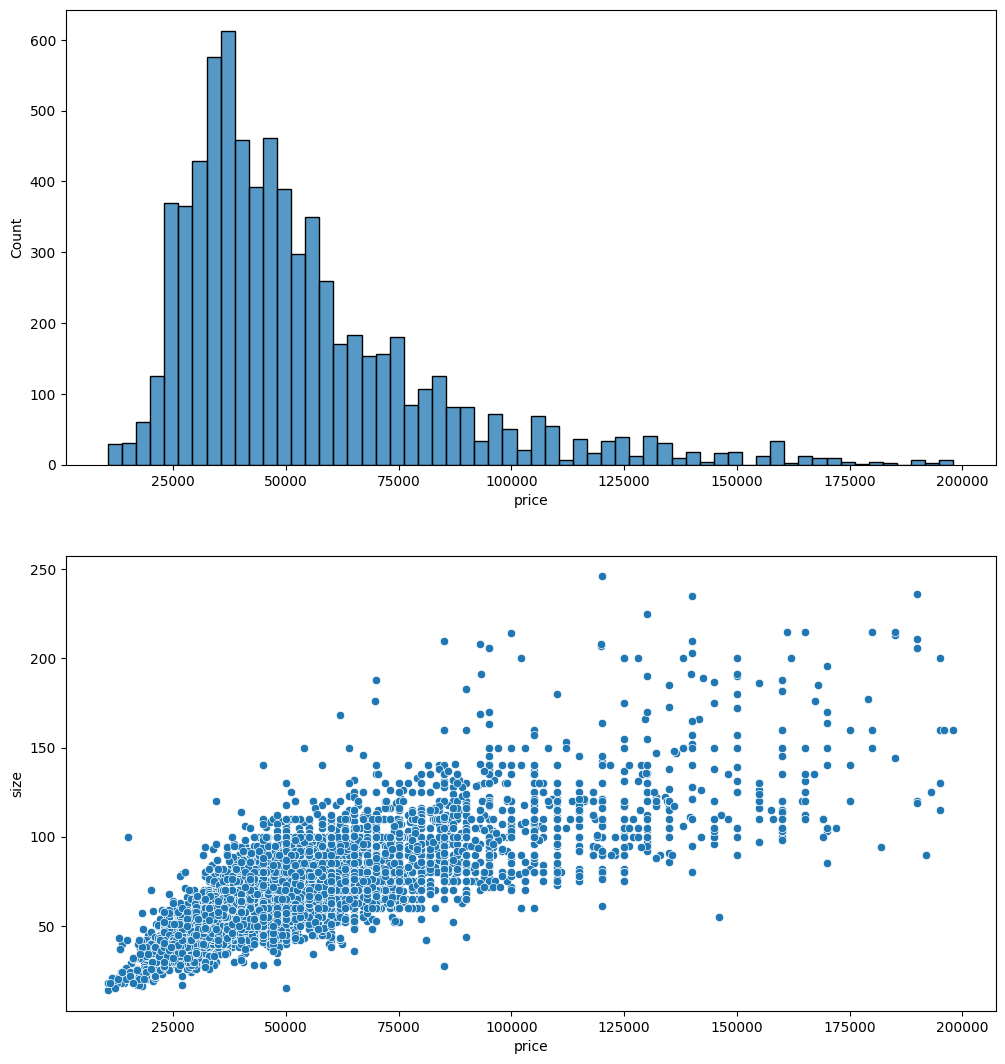

In [79]:
# JAVOB UCHUN JOY
plt.figure(figsize=(12,13))

plt.subplot(2,1,1)
sns.histplot(data=df,x='price')

plt.subplot(2,1,2)
sns.scatterplot(data=df,x='price',y='size')
plt.show()

<Figure size 1200x1200 with 0 Axes>

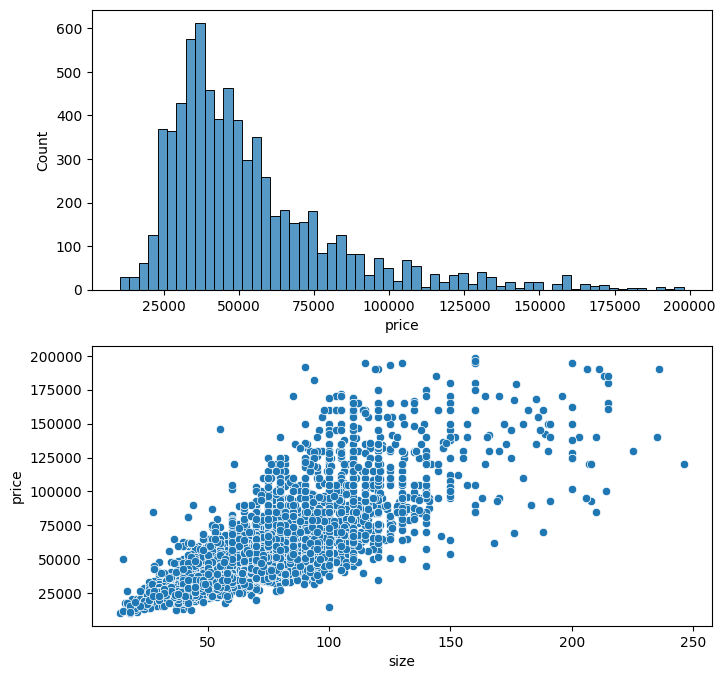

In [84]:
fig1=plt.figure(figsize=(12,12))
fig,ax =plt.subplots(2,1,figsize=(8,8))
sns.histplot(ax=ax[0],data=df,x='price')
sns.scatterplot(ax=ax[1],data=df,x='size',y='price')
plt.show()

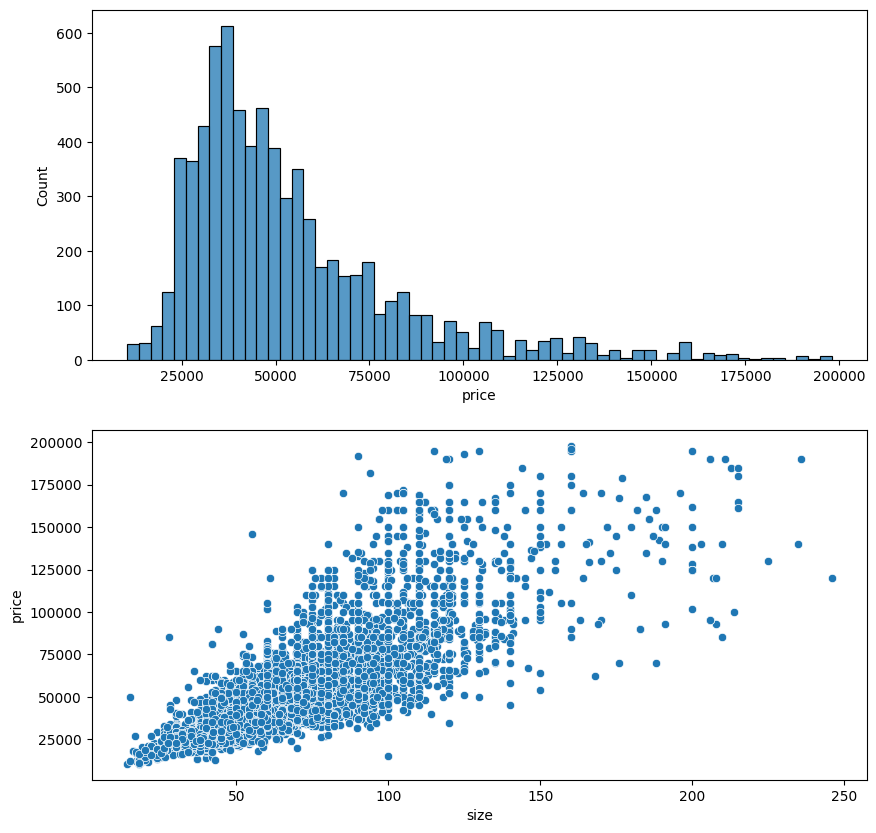

In [59]:
#@title Kutilgan natija
fig, ax = plt.subplots(2, 1, figsize=(10,10))
# Umumiy chizma nomini beramiz:
sns.histplot(ax=ax[0], data=df, x='price')
sns.scatterplot(ax=ax[1], data=df, x=df['size'], y=df['price'])
plt.show()

### 3-VAZIFA. Quyidagi grafikni chizing. Ahamiyat bering, oxirgi grafikda tumanlar bo'yicha uylarning o'rtacha narxi tasvirlangan.

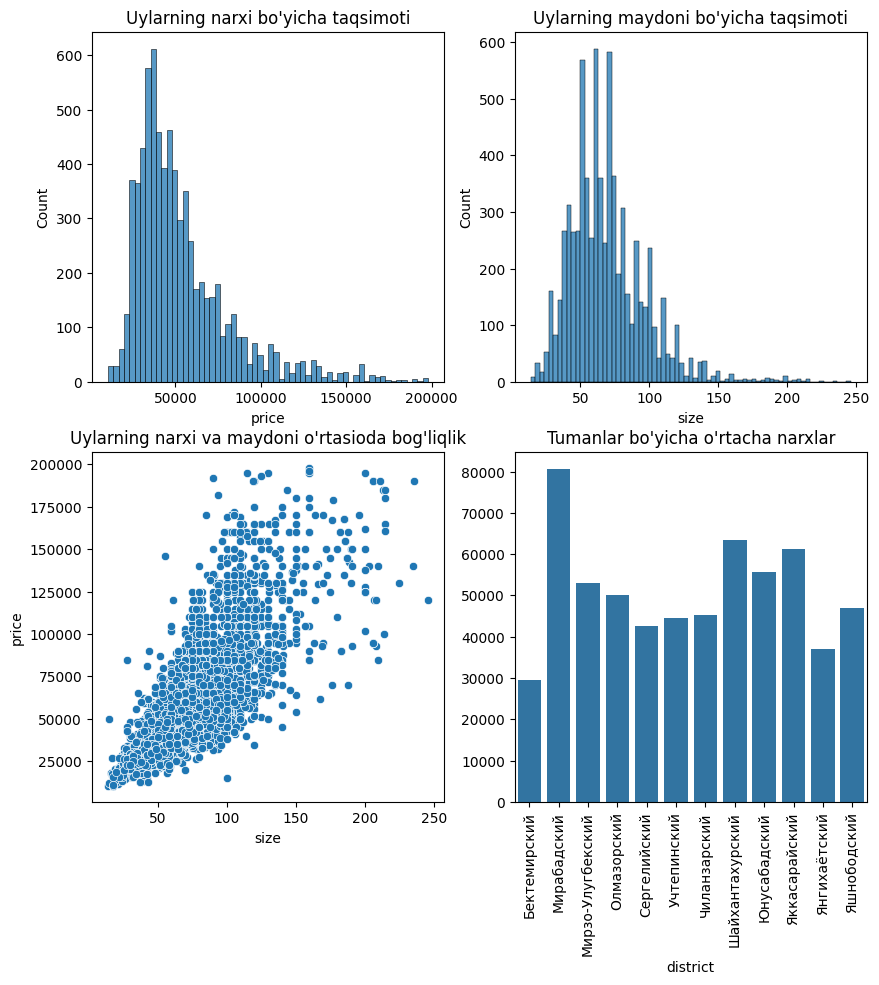

In [99]:
# JAVOB UCHUN JOY
disf=df.groupby('district').price.mean()
fig,ax=plt.subplots(2,2,figsize=(10,10))
# Umumiy chizma nomini beramiz:
sns.histplot(ax=ax[0, 0], data=df, x='price')
sns.histplot(ax=ax[0, 1], data=df, x='size')
sns.scatterplot(ax=ax[1, 0], data=df, x=df['size'], y=df['price'])
sns.barplot(ax=ax[1, 1], x=disf.index, y=disf.values)
# Har bir grafik uchun nom:
ax[0,0].set_title("Uylarning narxi bo'yicha taqsimoti")
ax[0,1].set_title("Uylarning maydoni bo'yicha taqsimoti")
ax[1,0].set_title("Uylarning narxi va maydoni o'rtasioda bog'liqlik")
ax[1,1].set_title("Tumanlar bo'yicha o'rtacha narxlar")
plt.xticks(rotation=90)
plt.show()

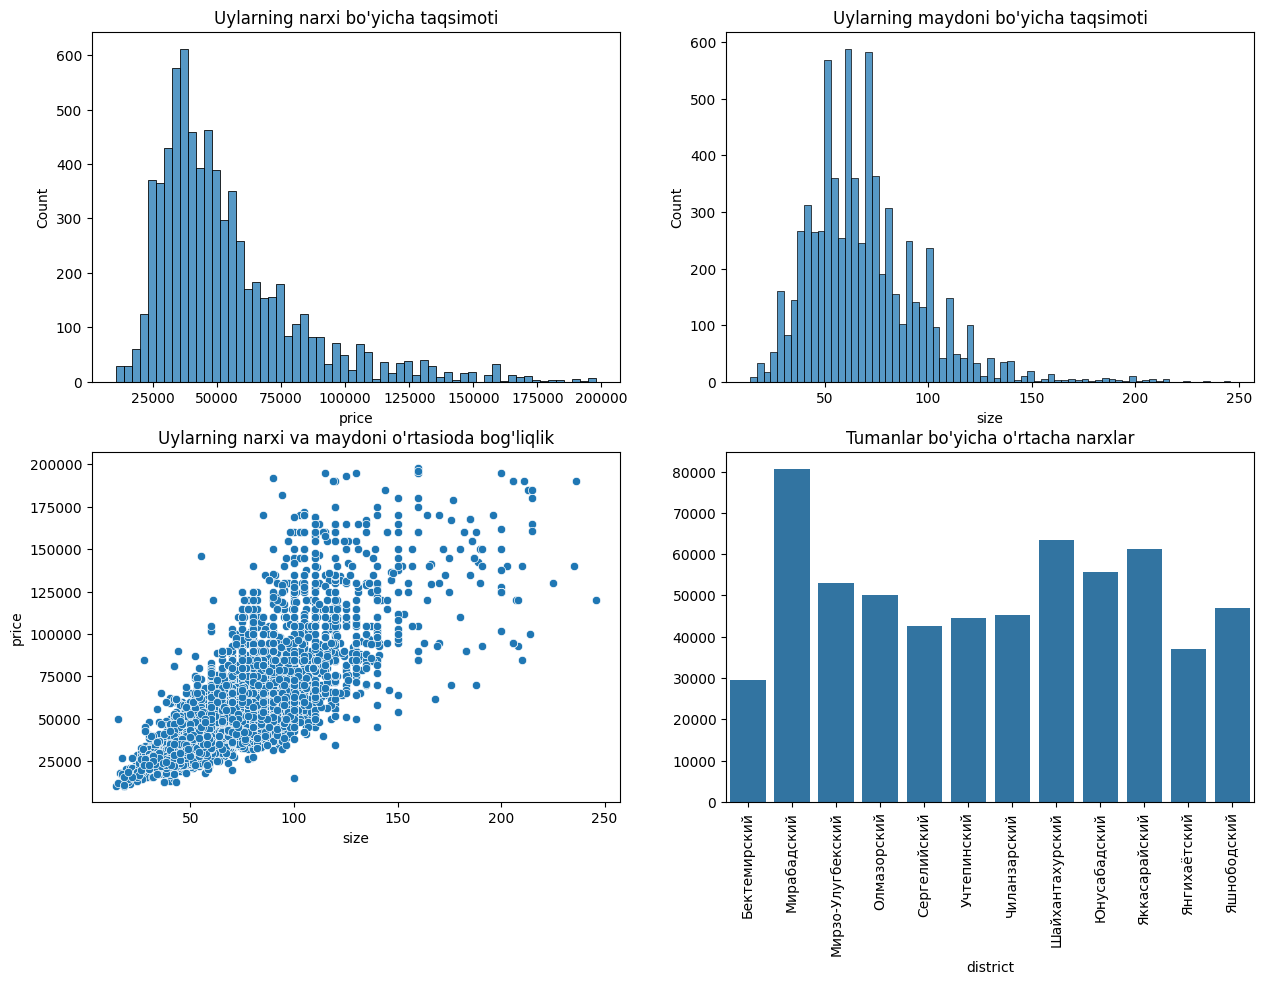

In [100]:
#@title Kutilgan natija

# Tumanlar bo'yicha jamlangan df
distdf = df.groupby('district').price.mean()

#Grafiklarni chizamiz
fig, ax = plt.subplots(2, 2, figsize=(15,10))
# Umumiy chizma nomini beramiz:
sns.histplot(ax=ax[0, 0], data=df, x='price')
sns.histplot(ax=ax[0, 1], data=df, x='size')
sns.scatterplot(ax=ax[1, 0], data=df, x=df['size'], y=df['price'])
sns.barplot(ax=ax[1, 1], x=distdf.index, y=distdf.values)
# Har bir grafik uchun nom:
ax[0,0].set_title("Uylarning narxi bo'yicha taqsimoti")
ax[0,1].set_title("Uylarning maydoni bo'yicha taqsimoti")
ax[1,0].set_title("Uylarning narxi va maydoni o'rtasioda bog'liqlik")
ax[1,1].set_title("Tumanlar bo'yicha o'rtacha narxlar")
plt.xticks(rotation=90)
plt.show()

In [97]:
disf

,price
district,
Бектемирский,29462.500000
Мирабадский,80758.468839
Мирзо-Улугбекский,52949.252624
Олмазорский,50172.505747
Сергелийский,42607.376623
Учтепинский,44494.240506
Чиланзарский,45377.165942
Шайхантахурский,63386.025352
Юнусабадский,55578.711401
